# Importação da bibliotecas

In [1]:
import numpy as np
from PIL import Image
import glob
import matplotlib.pyplot as plt
from sklearn.utils.extmath import randomized_svd
import utils_imagem as utl

# Definição de constantes

In [2]:
m = 180 # altura da imagem
n = 130 # largura da imagem
DIMENSAO_IMAGEM = (m, n)

# Altera o valor da constante no módulo de processamento de imagens
utl.DIMENSAO_IMAGEM = DIMENSAO_IMAGEM

# Gerar matrizes A e M, e a face média 

In [3]:
# Matriz A(mn x q) na qual as colunas são as 'q' imagens do banco de imagens
(q, A) = utl.varrer_banco_imagens('src/EMAP_face_db/*')

# Vetor f(mn x 1) com a média das colunas A, no caso, a face média
face_media = np.mean(A, axis=1, keepdims=True)

# Matriz M(mn x q) de média corrigida
M = A - face_media 

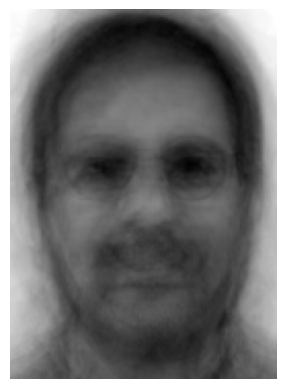

In [4]:
utl.plotar_imagem(face_media)

# Visualizar as faces originais (em A) e as faces corrigidas pela média (em M)

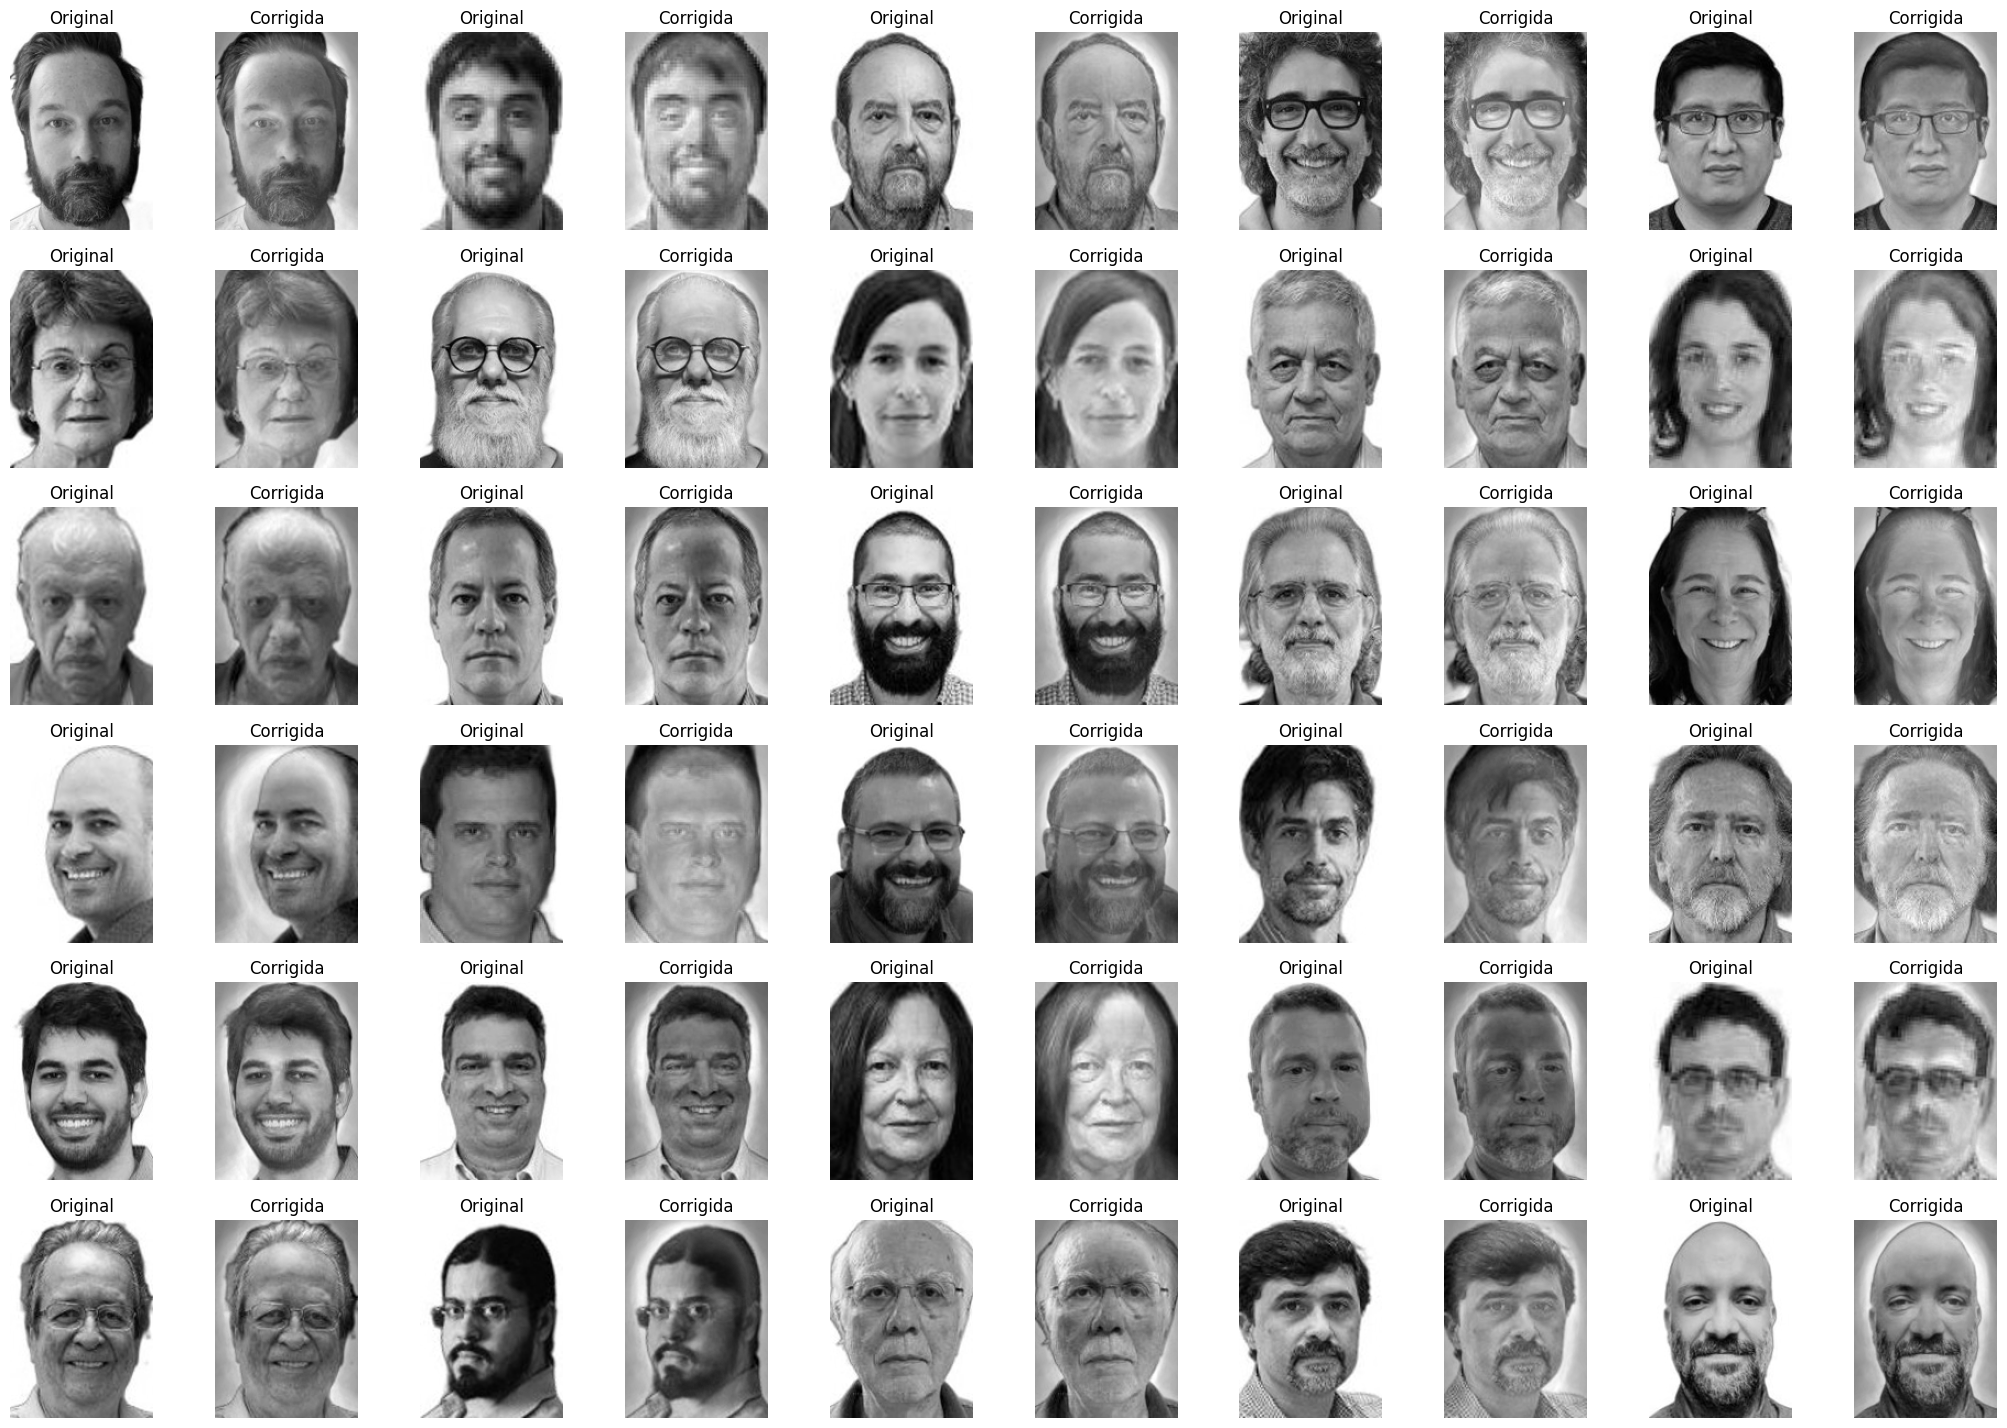

In [15]:
utl.plotar_grade_alternada((A,M), ('Original','Corrigida'), False, 6, 10, (26,18), '')

# Gerar matrizes U e C

In [7]:
# Matriz de covariância de A, C(mn x mn)
C = np.cov(M)

Nota: U_C e U_A são matrizes de dimensão (mn x q)

In [8]:
# Decomposição SVD na forma reduzida por causa de 'full_matrices=False'
U_C, autovalores_C, VT_C = randomized_svd(C, n_components=40, n_iter=5, random_state=None)

In [9]:
# Decomposição SVD na forma reduzida por causa de 'full_matrices=False'
U_A, autovalores_A, _ = np.linalg.svd(A, full_matrices=False) # U já está ordenada em relação aos autovalores

# Visualizar eigenfaces de A

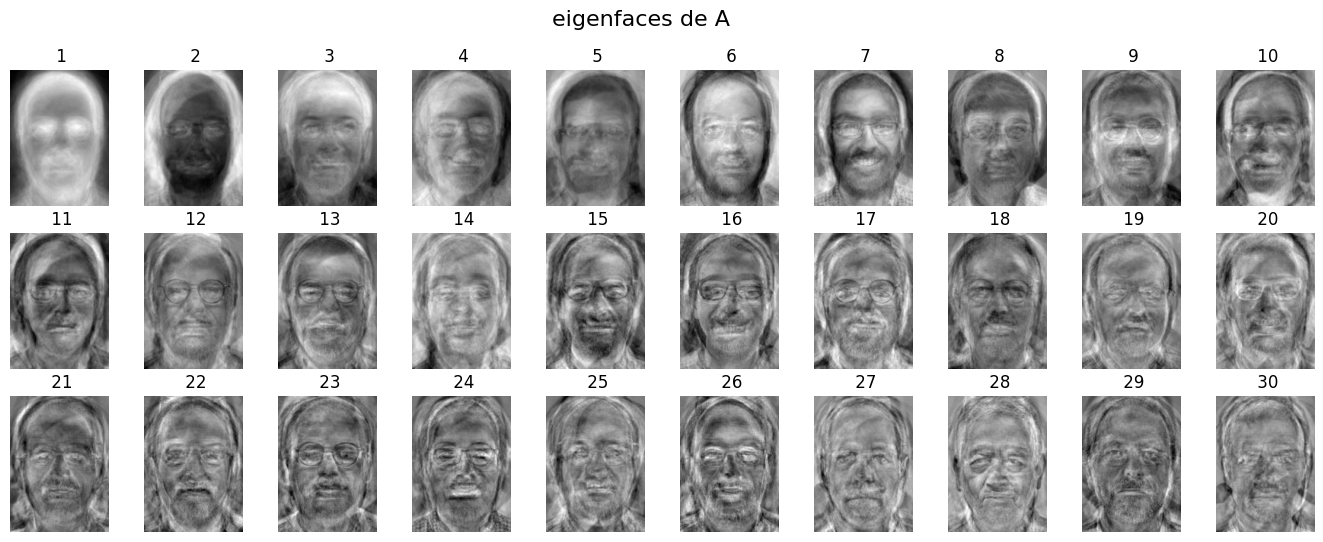

In [10]:
utl.plotar_grade(U_A, '', 3, 10, (17,6), 'eigenfaces de A')

# Visualizar eigenfaces C

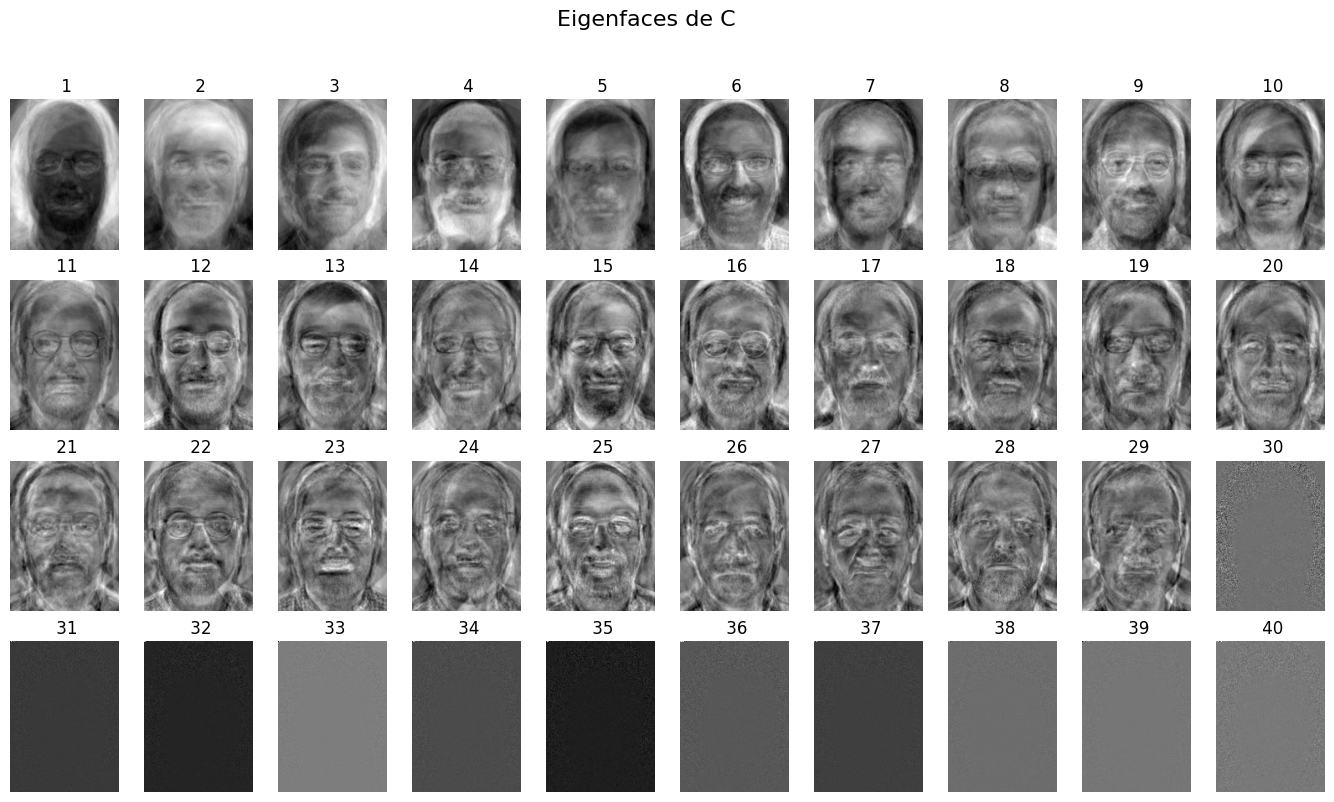

In [11]:
utl.plotar_grade(U_C, '', 4, 10, (17,9), 'Eigenfaces de C')

# Comparação entre as eigenfaces originadas de C e A

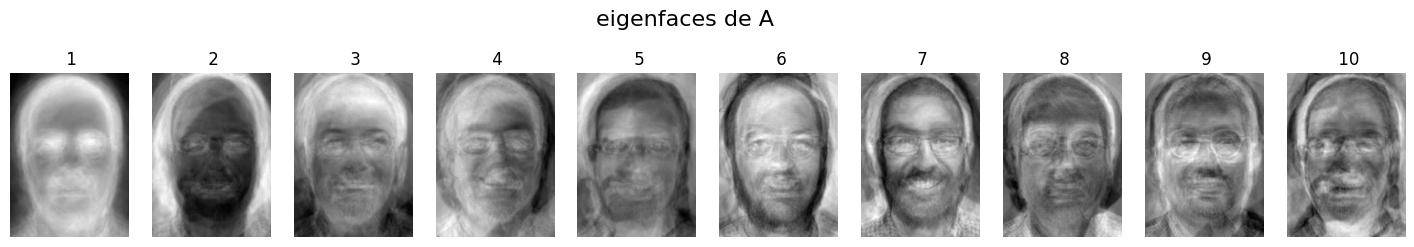

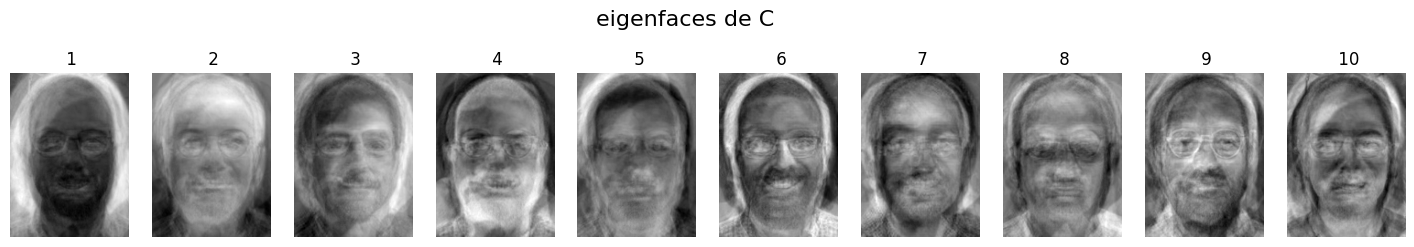

In [12]:
utl.plotar_grade(U_A, '', 1, 10, (18,3), 'eigenfaces de A')
utl.plotar_grade(U_C, '', 1, 10, (18,3), 'eigenfaces de C')

# Reconstrução a partir de A (SVD) e C (PCA)

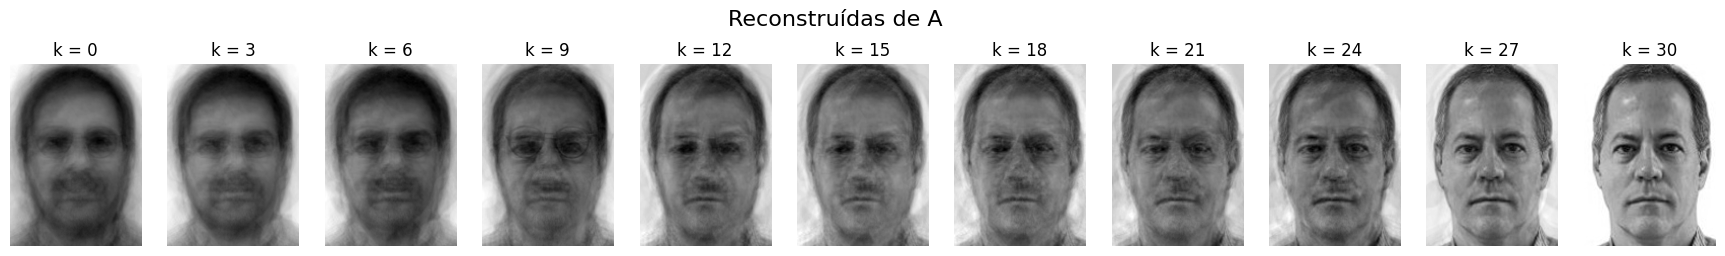

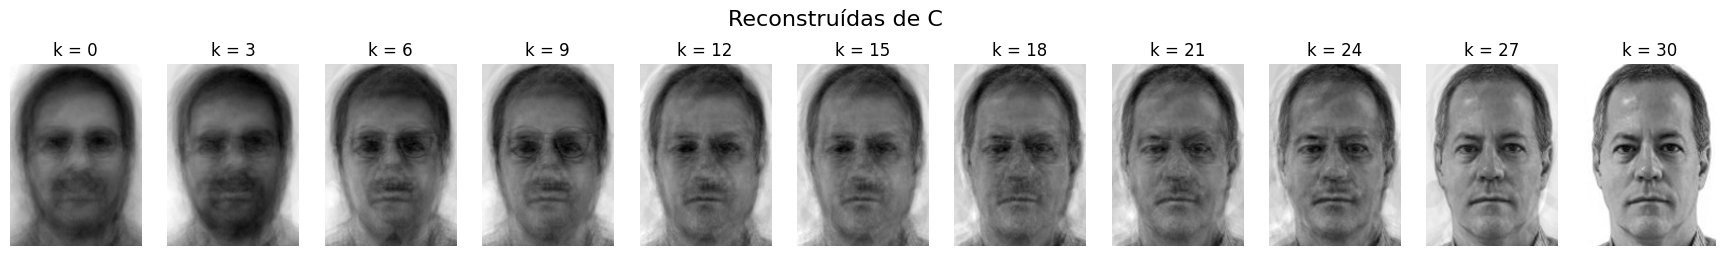

In [13]:
# Coeficientes de projeção para as eigenfaces de U_A e U_C
coeficientes_A = np.dot(U_A.T, M)
coeficientes_C = np.dot(U_C.T, M)

# Instaciação de variáveis
lista_A = []
lista_C = []
qtd_testes = 0

# Indice da pessoa a ter a imagem reconstruida
pessoa_escolhida = 11

# Define intervalo para a quantidade de dimensoes para a reconstrução
intervalo = range(31)[0::3]

for dimensao in intervalo :
    qtd_testes += 1
    
    # Reconstrução da imagem usando as eigenfaces
    imagem_reconstruida_A = np.dot(U_A[:, :dimensao], coeficientes_A[:dimensao, :]) + face_media
    imagem_reconstruida_C = np.dot(U_C[:, :dimensao], coeficientes_C[:dimensao, :]) + face_media
    
    # Remodelar a imagem reconstruída para as dimensões originais
    imagem_reconstruida_A = imagem_reconstruida_A[:,pessoa_escolhida]
    imagem_reconstruida_C = imagem_reconstruida_C[:,pessoa_escolhida]

    # Salvar imagem em uma lista
    lista_A.append(imagem_reconstruida_A)
    lista_C.append(imagem_reconstruida_C)

# Converte as listas em matrizes
A_rec = np.array(lista_A).T
C_rec = np.array(lista_C).T

utl.plotar_grade(A_rec, intervalo, 1, qtd_testes, (22,3), 'Reconstruídas de A')
utl.plotar_grade(C_rec, intervalo, 1, qtd_testes, (22,3), 'Reconstruídas de C')